# House Price Prediction

### Advance Regression Problem Statement :

 A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.
 The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties.
### The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

- Also, determine the optimal value of lambda for ridge and lasso regression.

### Business Goal
- We will predict the price of houses with the available independent features , which will help them for the management to understand the pricing dynamics of a new market.

# Importing Libraries:

In [1]:
import numpy as np  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression,Ridge,Lasso

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data set
house_data_raw=pd.read_csv("train.csv")

In [3]:
house_data_raw.shape

(1460, 81)

In [4]:
house_data_raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
house_data_raw.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
house_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Data Preprocessing and mining :

In [7]:
# For displaying all the columns and rows in pandas data frame :
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
# Printing any duplicate rows in the data set :
house_data_raw.drop_duplicates(subset=['Id'])
print("Rows:",house_data_raw.shape[0])

Rows: 1460


In [9]:
# Printing the columns with null values only
print(house_data_raw[house_data_raw.columns[house_data_raw.isnull().any()]].isnull().sum())

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [10]:
# Finding the significance of all null values columns from data set

print("Unique Alley data :",house_data_raw['Alley'].unique())
print("Unique PoolQC data :",house_data_raw['PoolQC'].unique())
print("Unique Fence data :",house_data_raw['Fence'].unique())
print("Unique MiscFeature data :",house_data_raw['MiscFeature'].unique())
print("Unique FireplaceQu data :",house_data_raw['FireplaceQu'].unique())


Unique Alley data : [nan 'Grvl' 'Pave']
Unique PoolQC data : [nan 'Ex' 'Fa' 'Gd']
Unique Fence data : [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
Unique MiscFeature data : [nan 'Shed' 'Gar2' 'Othr' 'TenC']
Unique FireplaceQu data : [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']


## Data imputation :

In [11]:
# creating a save check point
house_data = house_data_raw.copy()

In [12]:
house_data['Alley'] = house_data['Alley'].fillna('No Alley')
house_data['PoolQC'] = house_data['PoolQC'].fillna('No Pool')
house_data['Fence'] = house_data['Fence'].fillna('No Fence')
house_data['MiscFeature'] = house_data['MiscFeature'].fillna('No Misc')
house_data['FireplaceQu'] = house_data['FireplaceQu'].fillna('No Fireplace')

In [13]:
print(house_data[house_data.columns[house_data.isnull().any()]].isnull().sum())

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64


In [14]:
# finding median of feature
house_data['LotFrontage'].median()

69.0

In [15]:
# Imputing numerical null data value with the median of the data
house_data['LotFrontage'] = house_data['LotFrontage'].fillna(house_data['LotFrontage'].median())

In [16]:
# finding the mean of feature
house_data['MasVnrArea'].mean()

103.68526170798899

In [17]:
# imputing null values with the mean and no manson in numerical and categorical column
house_data['MasVnrArea'] = house_data['MasVnrArea'].fillna(house_data['MasVnrArea'].mean())
house_data['MasVnrType'] = house_data['MasVnrType'].fillna('No Manson')


In [18]:
# imputing null values with No basement in houes
house_data['BsmtFinType2'] = house_data['BsmtFinType2'].fillna('No Base')

house_data['BsmtExposure'] = house_data['BsmtExposure'].fillna('No Base')

house_data['BsmtQual'] = house_data['BsmtQual'].fillna('No Base')

house_data['BsmtCond'] = house_data['BsmtCond'].fillna('No Base')

house_data['BsmtFinType1'] = house_data['BsmtFinType1'].fillna('No Base')

In [19]:
# imputing null value with mode of data
house_data['Electrical'] = house_data['Electrical'].fillna(house_data['Electrical'].mode()[0])

In [20]:
# imputing null values with no garage
house_data['GarageType'] = house_data['GarageType'].fillna('No Garage')

house_data['GarageFinish'] = house_data['GarageFinish'].fillna('No Garage')

house_data['GarageQual'] = house_data['GarageQual'].fillna('No Garage')

house_data['GarageCond'] = house_data['GarageCond'].fillna('No Garage')

house_data['GarageYrBlt'] = house_data['GarageYrBlt'].fillna('No Garage')

In [21]:
# no null values in our columns
print(house_data[house_data.columns[house_data.isnull().any()]].isnull().sum())

Series([], dtype: float64)


# Droping non useful feature :

In [22]:
house_data.shape

(1460, 81)

In [23]:
house_data.drop(['Id','Condition2','Exterior2nd','BsmtFinType2','BsmtFinSF2'], axis=1, inplace=True)

In [24]:
house_data.shape

(1460, 76)

In [25]:
house_data.describe(percentiles=[0.25,0.50,0.75,0.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.280000,1572.410000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Removing outliers :

In [26]:
# second saving point
house_ro=house_data.copy()

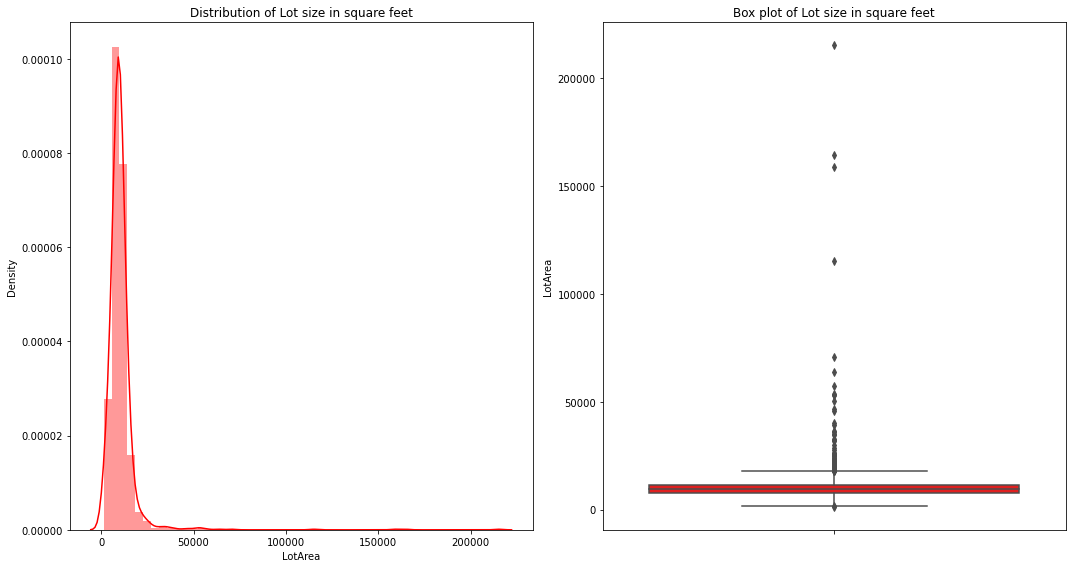

In [27]:

fig, axes = plt.subplots(1,2,figsize=(15,8))
# Distribution of Lot Area data
sns.distplot(house_ro['LotArea'],color='r',ax=axes[0])
sns.boxplot(y=house_ro['LotArea'],color='r',ax=axes[1])
axes[0].set_title('Distribution of Lot size in square feet')
axes[1].set_title('Box plot of Lot size in square feet')
plt.tight_layout()
plt.show()

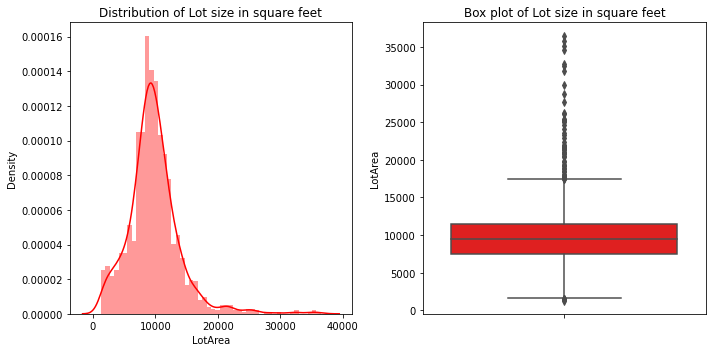

In [28]:
max_threshold=house_ro['LotArea'].quantile(0.99)

house_ro=house_ro[house_ro['LotArea']<max_threshold]


fig, axes = plt.subplots(1,2,figsize=(10,5))

# Distribution of LotArea data after outlier treatment
sns.distplot(house_ro['LotArea'],color='r',ax=axes[0])
sns.boxplot(y=house_ro['LotArea'],color='r',ax=axes[1])
axes[0].set_title('Distribution of Lot size in square feet')
axes[1].set_title('Box plot of Lot size in square feet')
plt.tight_layout()
plt.show()

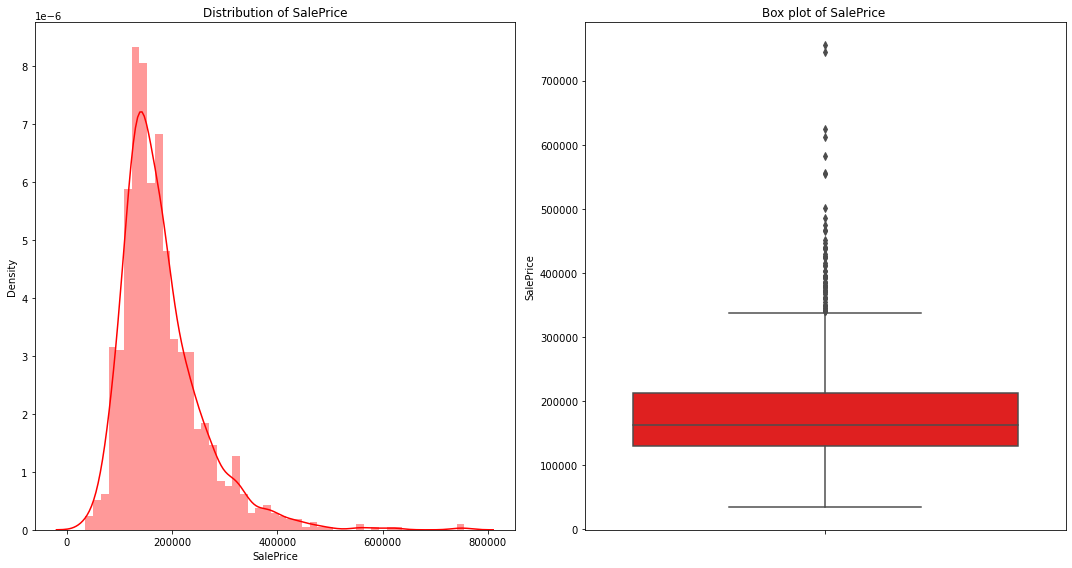

In [29]:
fig, axes = plt.subplots(1,2,figsize=(15,8))
# Distribution of Lot Area data
sns.distplot(house_ro['SalePrice'],color='r',ax=axes[0])
sns.boxplot(y=house_ro['SalePrice'],color='r',ax=axes[1])
axes[0].set_title('Distribution of SalePrice')
axes[1].set_title('Box plot of SalePrice ')
plt.tight_layout()
plt.show()

# Derived Variables :

In [30]:
house_ro.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'Sc

In [31]:
# checking with the age of the age with respect to its property year sold and year built
house_ro['houseAge'] = house_ro['YrSold'] - house_ro['YearBuilt']
house_ro['remodeled'] = house_ro['YearRemodAdd'] - house_ro['YearBuilt']

In [32]:
house_ro.drop(['YearBuilt','YearRemodAdd','YrSold','MoSold','MiscFeature','MiscVal'], axis=1, inplace=True)

# Exploratory data Analysis :

In [33]:
house_ro.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,SaleType,SaleCondition,SalePrice,houseAge,remodeled
0,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,WD,Normal,208500,5,0
1,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,Gable,CompShg,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,WD,Normal,181500,31,0
2,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,No Fence,WD,Normal,223500,7,1
3,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,No Fence,WD,Abnorml,140000,91,55
4,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,No Fence,WD,Normal,250000,8,0


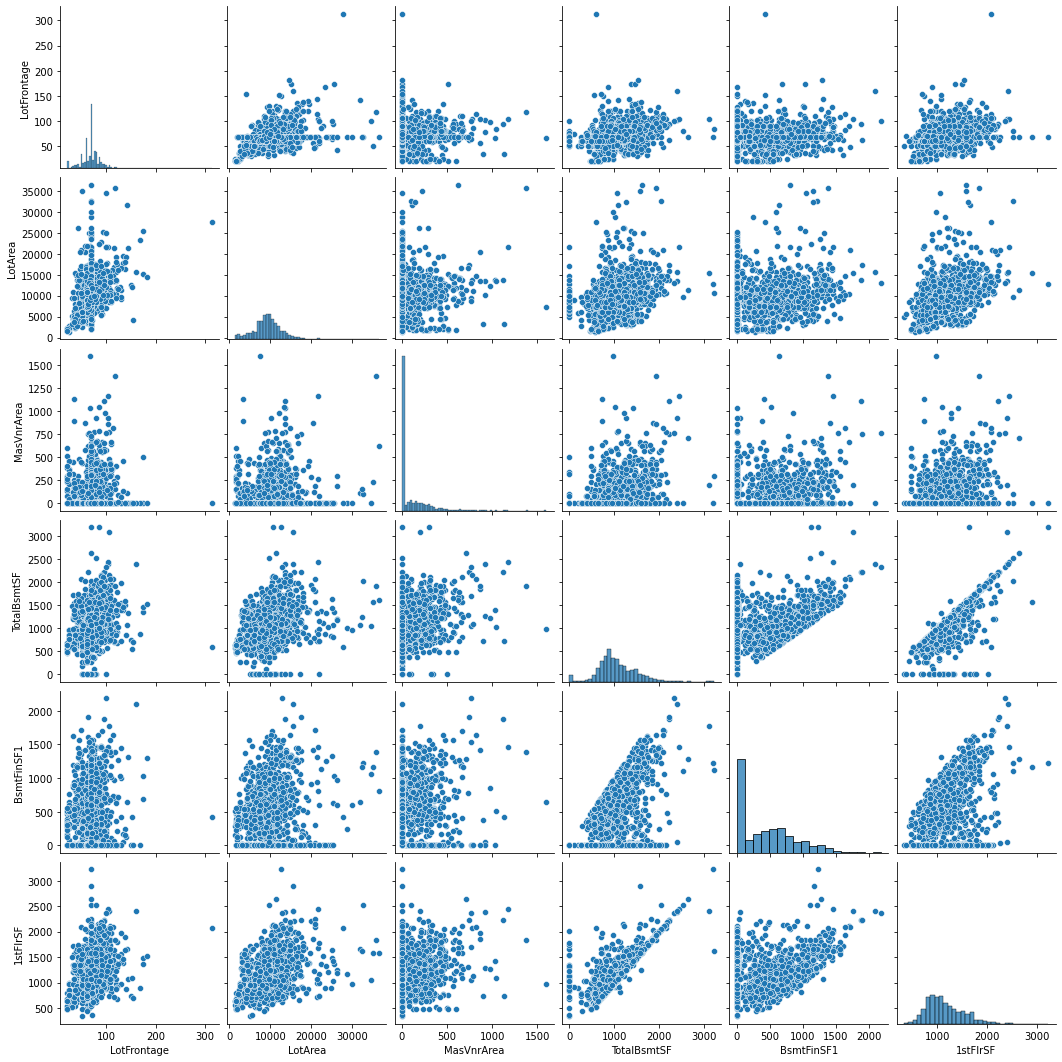

In [34]:
sns.pairplot(house_ro, vars = ['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', 'BsmtFinSF1' ,'1stFlrSF'], dropna = True)

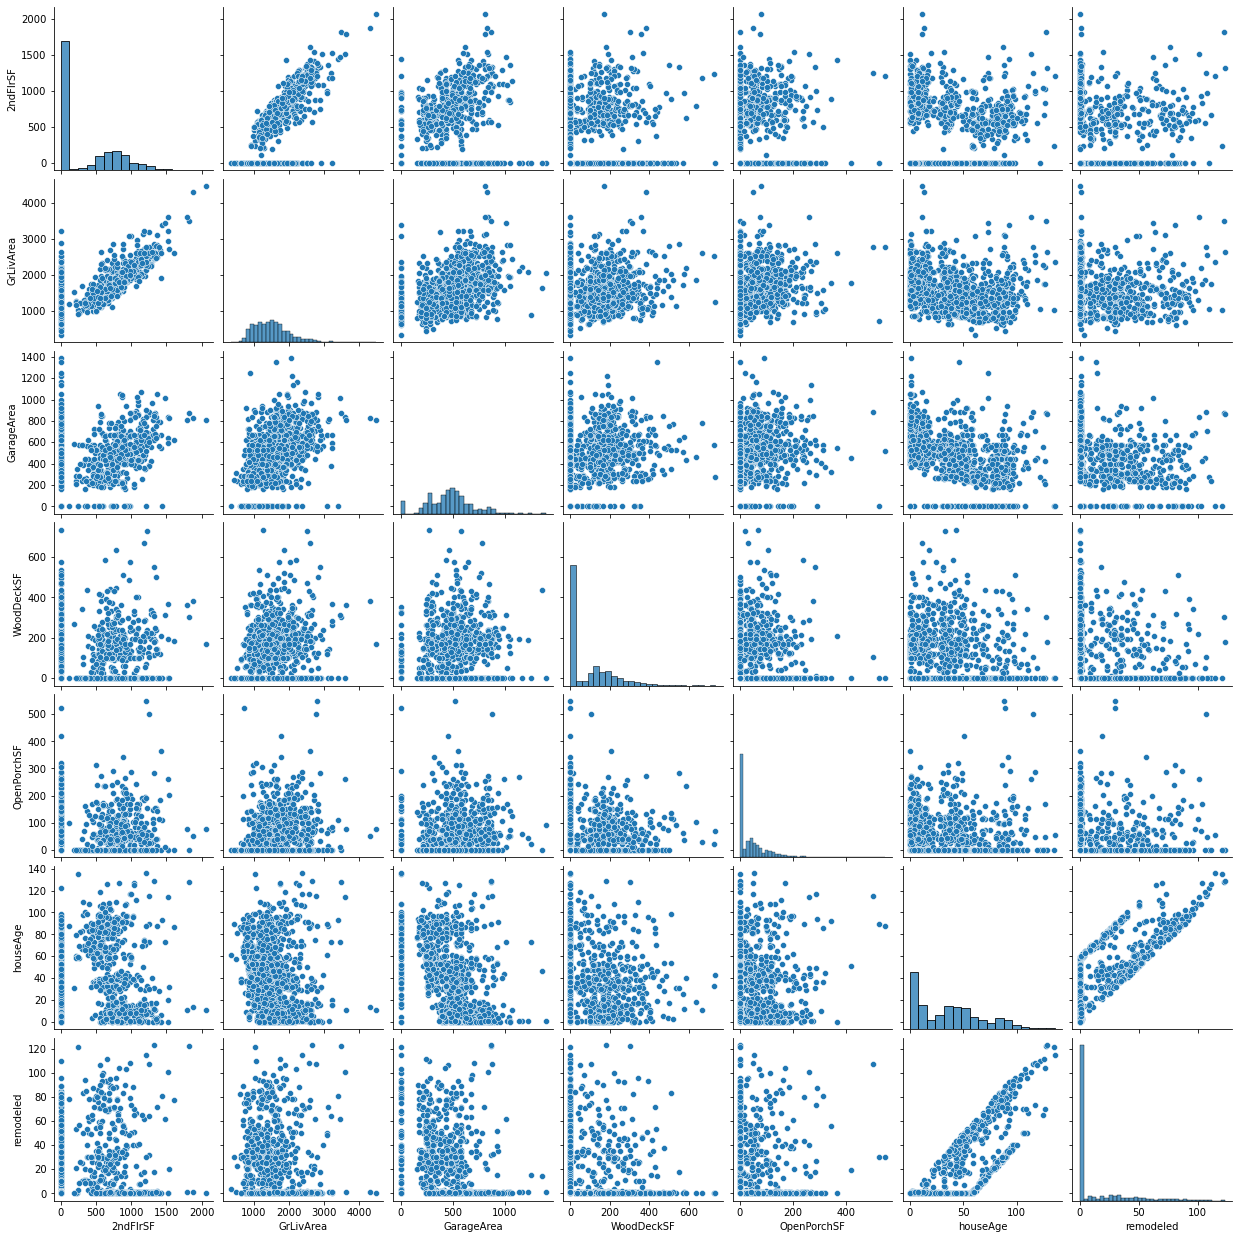

In [35]:
sns.pairplot(house_ro, vars = ['2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'houseAge','remodeled'], dropna = True)


In [36]:
columns=['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', 'BsmtFinSF1' ,'1stFlrSF','2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'houseAge','remodeled']

<Figure size 216x216 with 0 Axes>

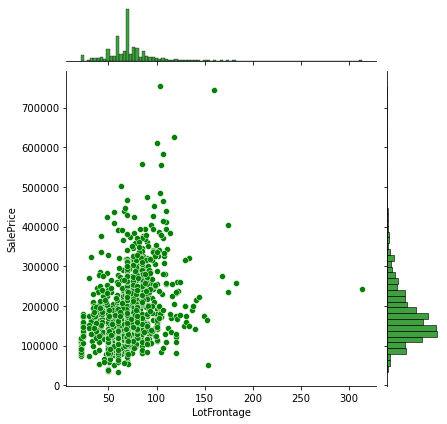

<Figure size 216x216 with 0 Axes>

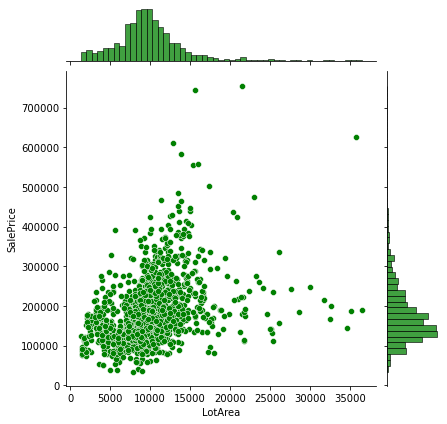

<Figure size 216x216 with 0 Axes>

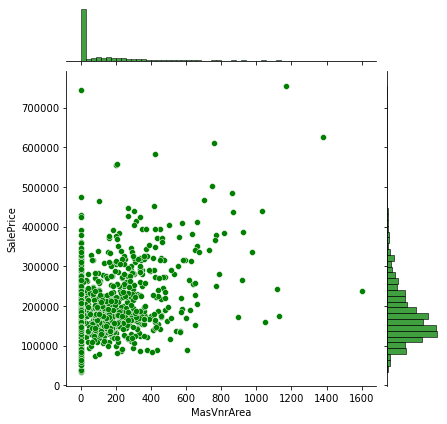

<Figure size 216x216 with 0 Axes>

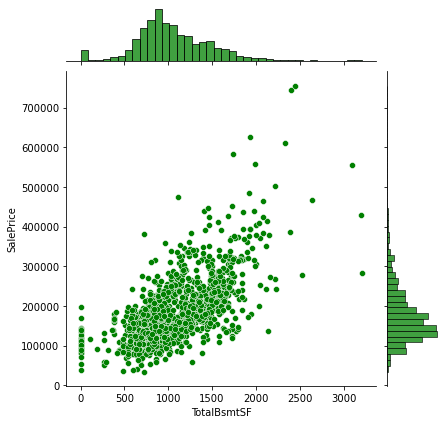

<Figure size 216x216 with 0 Axes>

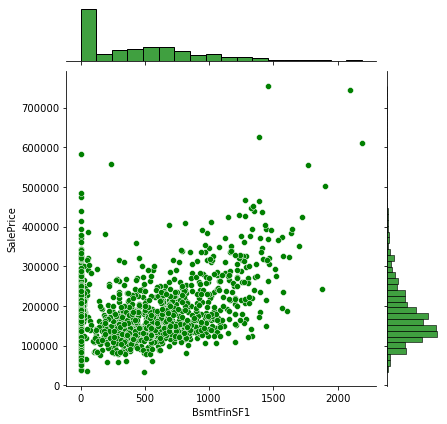

<Figure size 216x216 with 0 Axes>

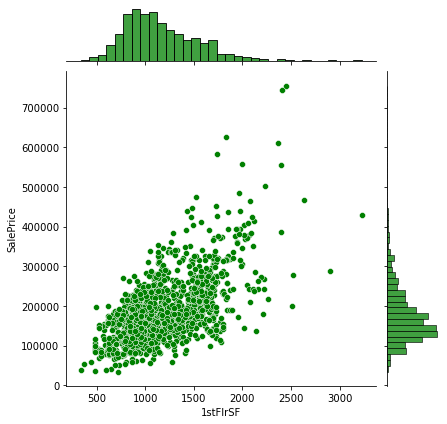

<Figure size 216x216 with 0 Axes>

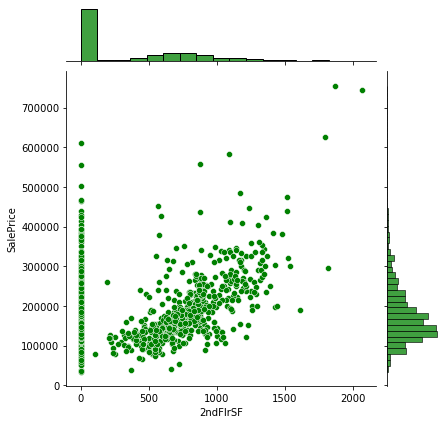

<Figure size 216x216 with 0 Axes>

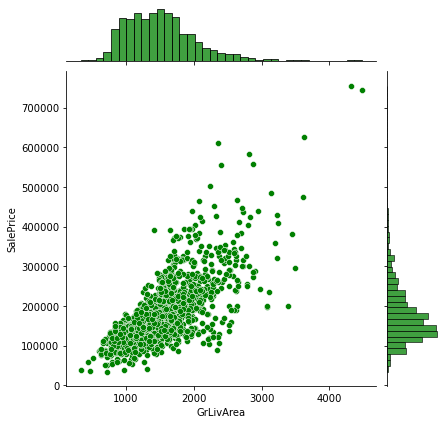

<Figure size 216x216 with 0 Axes>

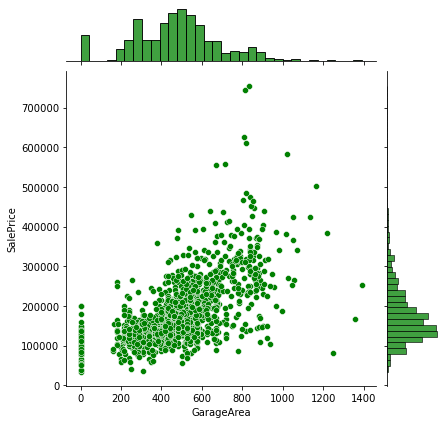

<Figure size 216x216 with 0 Axes>

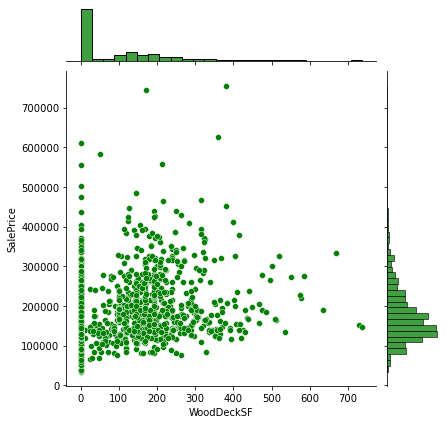

<Figure size 216x216 with 0 Axes>

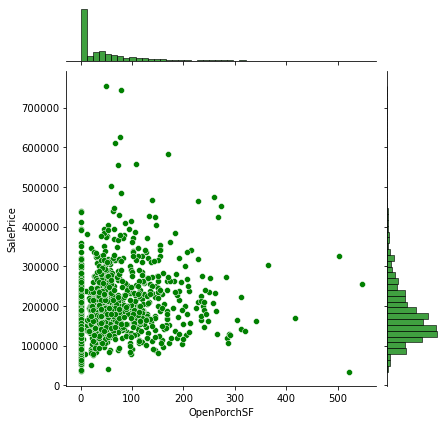

<Figure size 216x216 with 0 Axes>

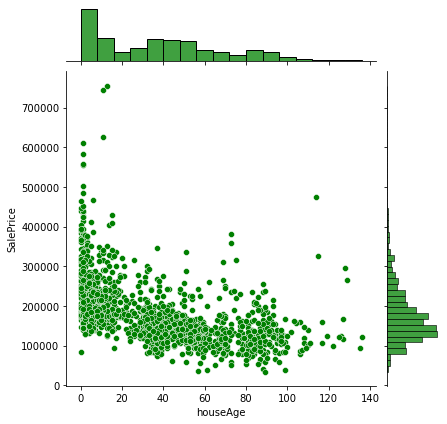

<Figure size 216x216 with 0 Axes>

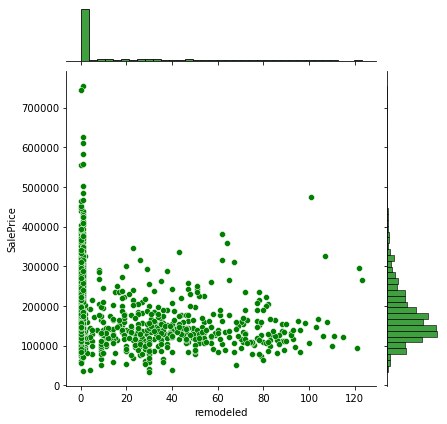

In [37]:
for i in columns:
    plt.figure(figsize=[3,3])
    sns.jointplot(x=i, y='SalePrice', data=house_ro, color= 'Green')
    plt.show()

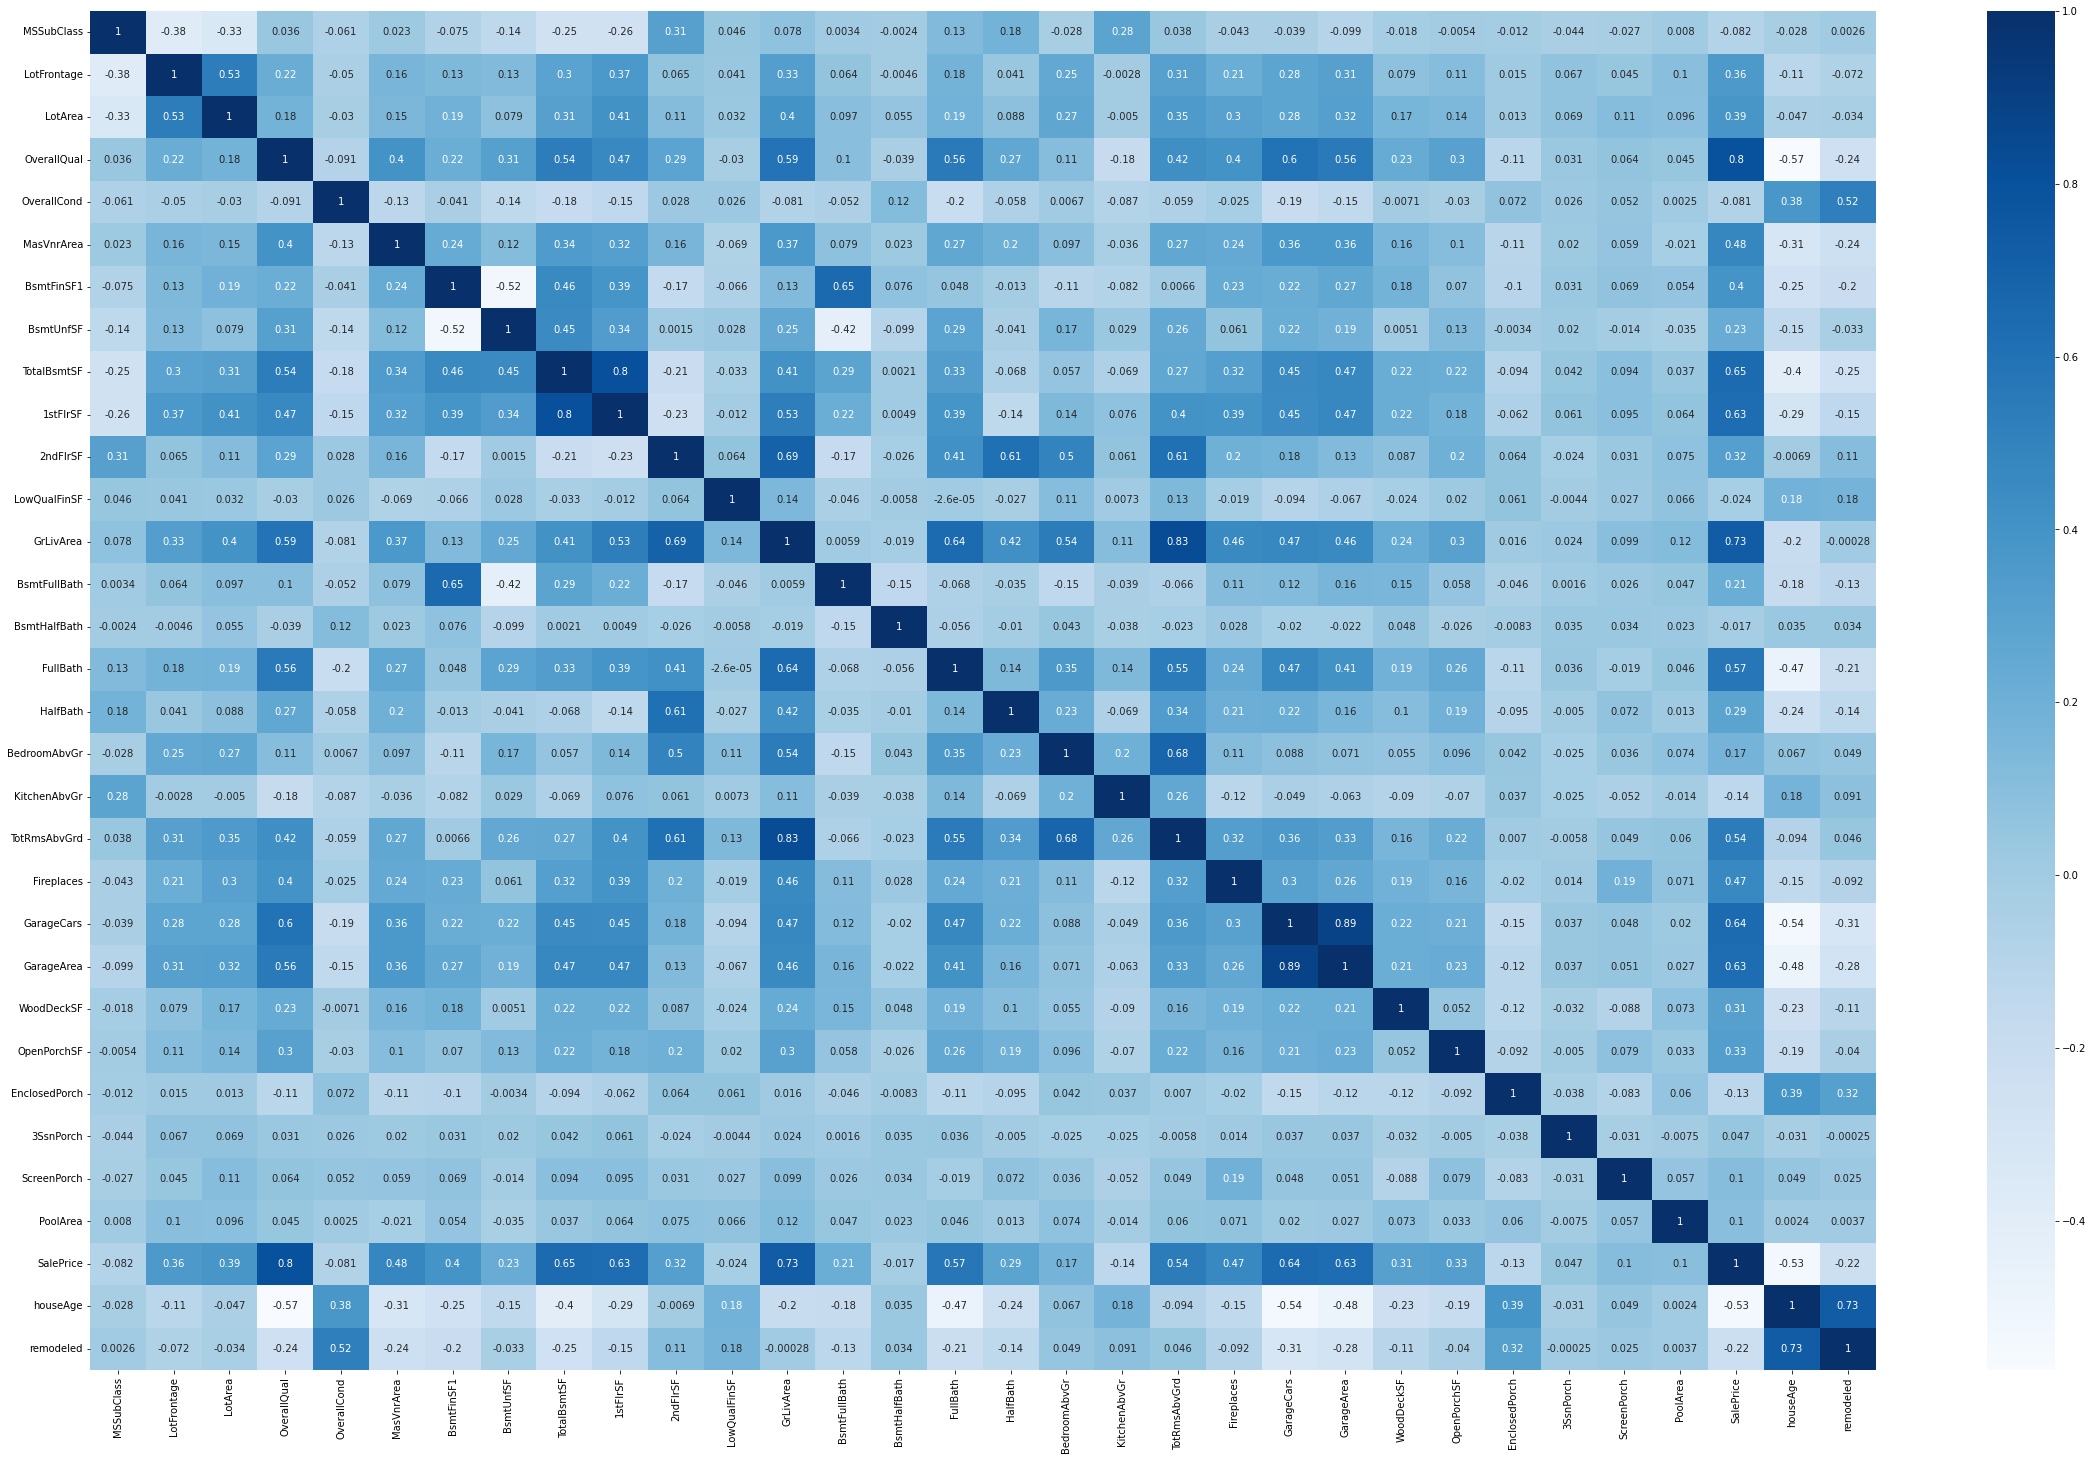

In [38]:
plt.figure(figsize=[40,25])
sns.heatmap(house_ro.corr(), cmap="Blues", annot=True)
plt.show()

In [39]:
house_ro.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'Pool

In [40]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [41]:
house_ro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1445 non-null   int64  
 1   MSZoning       1445 non-null   object 
 2   LotFrontage    1445 non-null   float64
 3   LotArea        1445 non-null   int64  
 4   Street         1445 non-null   object 
 5   Alley          1445 non-null   object 
 6   LotShape       1445 non-null   object 
 7   LandContour    1445 non-null   object 
 8   Utilities      1445 non-null   object 
 9   LotConfig      1445 non-null   object 
 10  LandSlope      1445 non-null   object 
 11  Neighborhood   1445 non-null   object 
 12  Condition1     1445 non-null   object 
 13  BldgType       1445 non-null   object 
 14  HouseStyle     1445 non-null   object 
 15  OverallQual    1445 non-null   int64  
 16  OverallCond    1445 non-null   int64  
 17  RoofStyle      1445 non-null   object 
 18  RoofMatl

In [42]:
house_enc=house_ro.copy()

In [43]:
import category_encoders as ce

colus=house_enc.drop(['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','SalePrice','houseAge','remodeled'], axis=1)

nums=house_enc.drop(['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','SaleType','SaleCondition'], axis=1)

ce_binary = ce.BinaryEncoder(cols = ['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','SaleType','SaleCondition'])

# fit and transform and prest, you've got encoded data

dat=ce_binary.fit_transform(colus,nums)


result = pd.concat([nums, dat], axis=1)
result.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,houseAge,remodeled,MSZoning_0,MSZoning_1,MSZoning_2,Street_0,Street_1,Alley_0,Alley_1,LotShape_0,LotShape_1,LotShape_2,LandContour_0,LandContour_1,LandContour_2,Utilities_0,Utilities_1,LotConfig_0,LotConfig_1,LotConfig_2,LandSlope_0,LandSlope_1,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Condition1_0,Condition1_1,Condition1_2,Condition1_3,BldgType_0,BldgType_1,BldgType_2,HouseStyle_0,HouseStyle_1,HouseStyle_2,HouseStyle_3,RoofStyle_0,RoofStyle_1,RoofStyle_2,RoofMatl_0,RoofMatl_1,RoofMatl_2,Exterior1st_0,Exterior1st_1,Exterior1st_2,Exterior1st_3,MasVnrType_0,MasVnrType_1,MasVnrType_2,ExterQual_0,ExterQual_1,ExterQual_2,ExterCond_0,ExterCond_1,ExterCond_2,Foundation_0,Foundation_1,Foundation_2,BsmtQual_0,BsmtQual_1,BsmtQual_2,BsmtCond_0,BsmtCond_1,BsmtCond_2,BsmtExposure_0,BsmtExposure_1,BsmtExposure_2,BsmtFinType1_0,BsmtFinType1_1,BsmtFinType1_2,Heating_0,Heating_1,Heating_2,HeatingQC_0,HeatingQC_1,HeatingQC_2,CentralAir_0,CentralAir_1,Electrical_0,Electrical_1,Electrical_2,KitchenQual_0,KitchenQual_1,KitchenQual_2,Functional_0,Functional_1,Functional_2,FireplaceQu_0,FireplaceQu_1,FireplaceQu_2,GarageType_0,GarageType_1,GarageType_2,GarageYrBlt_0,GarageYrBlt_1,GarageYrBlt_2,GarageYrBlt_3,GarageYrBlt_4,GarageYrBlt_5,GarageYrBlt_6,GarageFinish_0,GarageFinish_1,GarageFinish_2,GarageQual_0,GarageQual_1,GarageQual_2,GarageCond_0,GarageCond_1,GarageCond_2,PavedDrive_0,PavedDrive_1,PoolQC_0,PoolQC_1,PoolQC_2,Fence_0,Fence_1,Fence_2,SaleType_0,SaleType_1,SaleType_2,SaleType_3,SaleCondition_0,SaleCondition_1,SaleCondition_2
0,60,65.0,8450,7,5,196.0,706,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,208500,5,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,181500,31,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1
2,60,68.0,11250,7,5,162.0,486,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,223500,7,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1
3,70,60.0,9550,7,5,0.0,216,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,140000,91,55,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,250000,8,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1


In [44]:
house_data_enc=result

In [45]:
house_data_enc.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,houseAge,remodeled,MSZoning_0,MSZoning_1,MSZoning_2,Street_0,Street_1,Alley_0,Alley_1,LotShape_0,LotShape_1,LotShape_2,LandContour_0,LandContour_1,LandContour_2,Utilities_0,Utilities_1,LotConfig_0,LotConfig_1,LotConfig_2,LandSlope_0,LandSlope_1,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Condition1_0,Condition1_1,Condition1_2,Condition1_3,BldgType_0,BldgType_1,BldgType_2,HouseStyle_0,HouseStyle_1,HouseStyle_2,HouseStyle_3,RoofStyle_0,RoofStyle_1,RoofStyle_2,RoofMatl_0,RoofMatl_1,RoofMatl_2,Exterior1st_0,Exterior1st_1,Exterior1st_2,Exterior1st_3,MasVnrType_0,MasVnrType_1,MasVnrType_2,ExterQual_0,ExterQual_1,ExterQual_2,ExterCond_0,ExterCond_1,ExterCond_2,Foundation_0,Foundation_1,Foundation_2,BsmtQual_0,BsmtQual_1,BsmtQual_2,BsmtCond_0,BsmtCond_1,BsmtCond_2,BsmtExposure_0,BsmtExposure_1,BsmtExposure_2,BsmtFinType1_0,BsmtFinType1_1,BsmtFinType1_2,Heating_0,Heating_1,Heating_2,HeatingQC_0,HeatingQC_1,HeatingQC_2,CentralAir_0,CentralAir_1,Electrical_0,Electrical_1,Electrical_2,KitchenQual_0,KitchenQual_1,KitchenQual_2,Functional_0,Functional_1,Functional_2,FireplaceQu_0,FireplaceQu_1,FireplaceQu_2,GarageType_0,GarageType_1,GarageType_2,GarageYrBlt_0,GarageYrBlt_1,GarageYrBlt_2,GarageYrBlt_3,GarageYrBlt_4,GarageYrBlt_5,GarageYrBlt_6,GarageFinish_0,GarageFinish_1,GarageFinish_2,GarageQual_0,GarageQual_1,GarageQual_2,GarageCond_0,GarageCond_1,GarageCond_2,PavedDrive_0,PavedDrive_1,PoolQC_0,PoolQC_1,PoolQC_2,Fence_0,Fence_1,Fence_2,SaleType_0,SaleType_1,SaleType_2,SaleType_3,SaleCondition_0,SaleCondition_1,SaleCondition_2
count,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.00000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000
mean,56.982699,69.631142,9776.588927,6.089965,5.573702,102.331129,434.247059,569.089965,1048.608997,1154.901038,345.313495,5.905190,1506.119723,0.417993,0.057439,1.561938,0.382699,2.866436,1.047059,6.504498,0.601384,1

In [46]:
house_data_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 0 to 1459
Columns: 156 entries, MSSubClass to SaleCondition_2
dtypes: float64(2), int64(154)
memory usage: 1.8 MB


# Train test split :

In [47]:
# spliting the data frame into train test
X = house_data_enc.drop(['SalePrice'], axis=1)
y = house_data_enc['SalePrice']

In [48]:
from sklearn.model_selection import train_test_split
# using 70% training data and 30%  test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=90)
print(X_train.shape, X_test.shape)

(1011, 155) (434, 155)


In [49]:
X_train.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,houseAge,remodeled,MSZoning_0,MSZoning_1,MSZoning_2,Street_0,Street_1,Alley_0,Alley_1,LotShape_0,LotShape_1,LotShape_2,LandContour_0,LandContour_1,LandContour_2,Utilities_0,Utilities_1,LotConfig_0,LotConfig_1,LotConfig_2,LandSlope_0,LandSlope_1,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Condition1_0,Condition1_1,Condition1_2,Condition1_3,BldgType_0,BldgType_1,BldgType_2,HouseStyle_0,HouseStyle_1,HouseStyle_2,HouseStyle_3,RoofStyle_0,RoofStyle_1,RoofStyle_2,RoofMatl_0,RoofMatl_1,RoofMatl_2,Exterior1st_0,Exterior1st_1,Exterior1st_2,Exterior1st_3,MasVnrType_0,MasVnrType_1,MasVnrType_2,ExterQual_0,ExterQual_1,ExterQual_2,ExterCond_0,ExterCond_1,ExterCond_2,Foundation_0,Foundation_1,Foundation_2,BsmtQual_0,BsmtQual_1,BsmtQual_2,BsmtCond_0,BsmtCond_1,BsmtCond_2,BsmtExposure_0,BsmtExposure_1,BsmtExposure_2,BsmtFinType1_0,BsmtFinType1_1,BsmtFinType1_2,Heating_0,Heating_1,Heating_2,HeatingQC_0,HeatingQC_1,HeatingQC_2,CentralAir_0,CentralAir_1,Electrical_0,Electrical_1,Electrical_2,KitchenQual_0,KitchenQual_1,KitchenQual_2,Functional_0,Functional_1,Functional_2,FireplaceQu_0,FireplaceQu_1,FireplaceQu_2,GarageType_0,GarageType_1,GarageType_2,GarageYrBlt_0,GarageYrBlt_1,GarageYrBlt_2,GarageYrBlt_3,GarageYrBlt_4,GarageYrBlt_5,GarageYrBlt_6,GarageFinish_0,GarageFinish_1,GarageFinish_2,GarageQual_0,GarageQual_1,GarageQual_2,GarageCond_0,GarageCond_1,GarageCond_2,PavedDrive_0,PavedDrive_1,PoolQC_0,PoolQC_1,PoolQC_2,Fence_0,Fence_1,Fence_2,SaleType_0,SaleType_1,SaleType_2,SaleType_3,SaleCondition_0,SaleCondition_1,SaleCondition_2
405,20,69.0,9991,4,4,0.0,1116,165,1281,1620,0,0,1620,1,0,2,0,3,1,8,1,2,490,120,78,0,0,0,0,33,17,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,1,0,0,0,1,0,0,1
1090,90,60.0,8544,3,4,0.0,0,0,0,1040,0,0,1040,0,0,2,0,2,2,6,0,2,400,0,0,0,0,0,0,59,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,1,1,0,0,0,1,1,1,0,1,1,1,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1
377,60,102.0,11143,8,5,0.0,0,1580,1580,1580,886,0,2466,0,0,3,0,4,1,8,1,2,610,159,214,0,0,0,0,3,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,1,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1
894,90,64.0,7018,5,5,0.0,0,0,0,1535,0,0,1535,0,0,2,0,4,2,8,0,2,400,0,0,0,0,0,0,30,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,1,0,0,0,1,1,1,0,1,1,1,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,1,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1
1010,50,115.0,21286,5,5,0.0,0,720,720,720,551,0,1271,0,0,2,0,4,1,7,1,1,312,0,0,108,0,0,0,60,2,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,1,1,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1


In [50]:
col_type = list(X_train.select_dtypes(include=['int64','float64']).columns)

In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[col_type] = scaler.fit_transform(X_train[col_type])

X_test[col_type] = scaler.fit_transform(X_test[col_type])

In [52]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,houseAge,remodeled,MSZoning_0,MSZoning_1,MSZoning_2,Street_0,Street_1,Alley_0,Alley_1,LotShape_0,LotShape_1,LotShape_2,LandContour_0,LandContour_1,LandContour_2,Utilities_0,Utilities_1,LotConfig_0,LotConfig_1,LotConfig_2,LandSlope_0,LandSlope_1,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Condition1_0,Condition1_1,Condition1_2,Condition1_3,BldgType_0,BldgType_1,BldgType_2,HouseStyle_0,HouseStyle_1,HouseStyle_2,HouseStyle_3,RoofStyle_0,RoofStyle_1,RoofStyle_2,RoofMatl_0,RoofMatl_1,RoofMatl_2,Exterior1st_0,Exterior1st_1,Exterior1st_2,Exterior1st_3,MasVnrType_0,MasVnrType_1,MasVnrType_2,ExterQual_0,ExterQual_1,ExterQual_2,ExterCond_0,ExterCond_1,ExterCond_2,Foundation_0,Foundation_1,Foundation_2,BsmtQual_0,BsmtQual_1,BsmtQual_2,BsmtCond_0,BsmtCond_1,BsmtCond_2,BsmtExposure_0,BsmtExposure_1,BsmtExposure_2,BsmtFinType1_0,BsmtFinType1_1,BsmtFinType1_2,Heating_0,Heating_1,Heating_2,HeatingQC_0,HeatingQC_1,HeatingQC_2,CentralAir_0,CentralAir_1,Electrical_0,Electrical_1,Electrical_2,KitchenQual_0,KitchenQual_1,KitchenQual_2,Functional_0,Functional_1,Functional_2,FireplaceQu_0,FireplaceQu_1,FireplaceQu_2,GarageType_0,GarageType_1,GarageType_2,GarageYrBlt_0,GarageYrBlt_1,GarageYrBlt_2,GarageYrBlt_3,GarageYrBlt_4,GarageYrBlt_5,GarageYrBlt_6,GarageFinish_0,GarageFinish_1,GarageFinish_2,GarageQual_0,GarageQual_1,GarageQual_2,GarageCond_0,GarageCond_1,GarageCond_2,PavedDrive_0,PavedDrive_1,PoolQC_0,PoolQC_1,PoolQC_2,Fence_0,Fence_1,Fence_2,SaleType_0,SaleType_1,SaleType_2,SaleType_3,SaleCondition_0,SaleCondition_1,SaleCondition_2
405,0.000000,0.298137,0.246903,0.333333,0.285714,0.0,0.586134,0.076637,0.399563,0.444368,0.000000,0.0,0.322953,0.333333,0.0,0.666667,0.0,0.500000,0.333333,0.6,0.333333,0.50,0.352518,0.163043,0.142596,0.000000,0.0,0.0,0.0,0.242647,0.139344,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1090,0.411765,0.242236,0.205795,0.222222,0.285714,0.0,0.000000,0.000000,0.000000,0.243953,0.000000,0.0,0.177298,0.000000,0.0,0.666667,0.0,0.333333,0.666667,0.4,0.000000,0.50,0.287770,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.433824,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
377,0.235294,0.503106,0.279631,0.777778,0.428571,0.0,0.000000,0.733860,0.492826,0.430546,0.473291,0.0,0.535409,0.000000,0.0,1.000000,0.0,0.666667,0.333333,0.6,0.333333,0.50,0.438849,0.216033,0.391225,0.000000,0.0,0.0,0.0,0.022059,0.008197,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.

# Linear Regression:

In [53]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [54]:
rfe = RFE(linear_reg, n_features_to_select=160)            
rfe = rfe.fit(X_train, y_train) 

In [55]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))[:10]

[('MSSubClass', True, 1),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1)]

In [56]:
y_train_pred = linear_reg.predict(X_train)
y_test_pred = linear_reg.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_train_pred)
print('R-squared for training data = ', r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print('R-squared for test data = ', r2_test_lr)
metric.append(r2_test_lr)

rs1_lr = np.sum(np.square(y_train - y_train_pred))
print('Residual Sum of squared for training data = ', rs1_lr)
metric.append(rs1_lr)

rs2_lr = np.sum(np.square(y_test - y_test_pred))
print('Residual Sum of squared for test data = ',rs2_lr)
metric.append(rs2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print('Mean squared error for training data = ',mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print('Mean squared error for test data = ', mse_test_lr)
metric.append(mse_test_lr**0.5)

R-squared for training data =  0.922822840118724
R-squared for test data =  -4.0102150103283696e+20
Residual Sum of squared for training data =  436850955177.6875
Residual Sum of squared for test data =  1.2976485389725672e+33
Mean squared error for training data =  432097878.51403314
Mean squared error for test data =  2.9899735921026894e+30


# Model Evaulation :

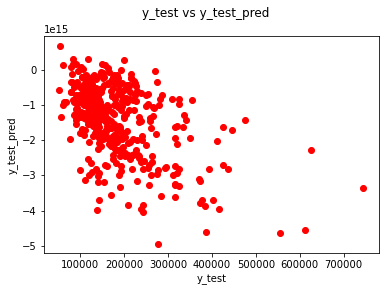

In [57]:
# model evaulation again y test predicted and y test
fig = plt.figure()
plt.scatter(y_test,y_test_pred, color='red')
fig.suptitle('y_test vs y_test_pred')              
plt.xlabel('y_test')                         
plt.ylabel('y_test_pred')  
plt.show()

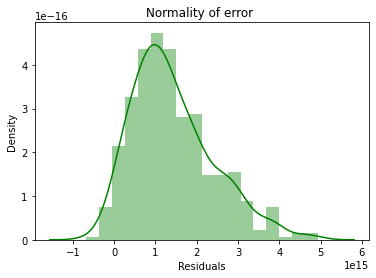

In [58]:
y_res=y_test-y_test_pred
# Distribution of errors
sns.distplot(y_res,kde=True, color='green')
plt.title('Normality of error ')
plt.xlabel("Residuals")
plt.show()

# Ridge Regression :

In [59]:
# alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]}
# making an instance for the class Ridge
ridge = Ridge()

# cross validation
folds = 7
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
# fitting the training data
model_cv.fit(X_train, y_train) 

Fitting 7 folds for each of 28 candidates, totalling 196 fits


GridSearchCV(cv=7, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [60]:
ridge_resu = pd.DataFrame(model_cv.cv_results_)
ridge_resu.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.007839,0.001734,0.003562,0.001483,0.0001,{'alpha': 0.0001},-17260.554791,-18093.666492,-18936.077883,-16184.134189,-17346.837549,-18587.495169,-17167.940153,-17653.815175,874.589773,18,-14062.182967,-13849.595736,-13685.124361,-14347.936952,-13900.381994,-13686.097670,-14256.295183,-13969.659266,243.309525
1,0.005418,0.001052,0.002426,0.000904,0.001,{'alpha': 0.001},-17260.171689,-18089.952029,-18935.558139,-16182.284966,-17344.381610,-18586.140732,-17166.545151,-17652.147759,874.710517,17,-14062.116049,-13849.454455,-13684.979605,-14347.646375,-13900.367381,-13686.021082,-14256.050249,-13969.519314,243.247628
2,0.005268,0.001021,0.002427,0.000723,0.01,{'alpha': 0.01},-17256.371192,-18053.306314,-18930.315792,-16164.017284,-17320.114324,-18573.385488,-17153.169756,-17635.811450,876.017709,16,-14061.524169,-13848.070269,-13683.718792,-14344.984862,-13900.430468,-13685.216833,-14253.625584,-13968.224425,242.656985
3,0.005988,0.000927,0.002991,0.000533,0.05,{'alpha': 0.05},-17239.633484,-17901.057519,-18906.413961,-16087.396180,-17227.798553,-18529.071576,-17103.599276,-17570.710078,882.957991,15,-14060.434962,-13842.901084,-13679.136892,-14338.486109,-13902.598363,-13682.927801,-14243.355755,-13964.262995,240.880048
4,0.005415,0.001290,0.002706,0.000878,0.1,{'alpha': 0.1},-17218.029206,-17737.930286,-18884.170112,-16002.192899,-17135.765292,-18491.660126,-17053.031833,-17503.254250,895.323924,14,-14059.354652,-13842.869406,-13679.500086,-14335.183431,-13906.705445,-13683.521855,-14233.818591,-13962.993352,238.216020


In [61]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 2.0}
-17066.60093652356


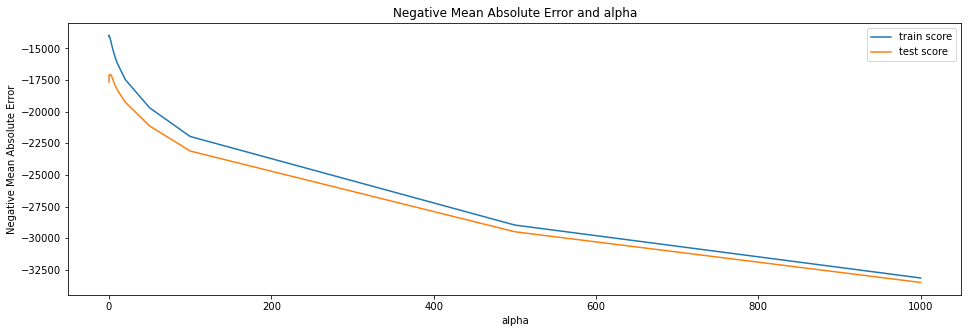

In [62]:
ridge_resu['param_alpha'] = ridge_resu['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(ridge_resu['param_alpha'], ridge_resu['mean_train_score'])
plt.plot(ridge_resu['param_alpha'], ridge_resu['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [63]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=2)

In [64]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metricr = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R-squared for training data = ', r2_train_lr)
metricr.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R-squared for test data = ', r2_test_lr)
metricr.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('Residual Sum of squared for training data = ', rss1_lr)
metricr.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('Residual Sum of squared for test data = ',rss2_lr)
metricr.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Mean squared error for training data = ',mse_train_lr)
metricr.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Mean squared error for test data = ', mse_test_lr)
metricr.append(mse_test_lr**0.5)

R-squared for training data =  0.9174924059557832
R-squared for test data =  0.9025975810733778
Residual Sum of squared for training data =  467023162332.9474
Residual Sum of squared for test data =  315180373837.7997
Mean squared error for training data =  461941802.50538814
Mean squared error for test data =  726222059.5341007


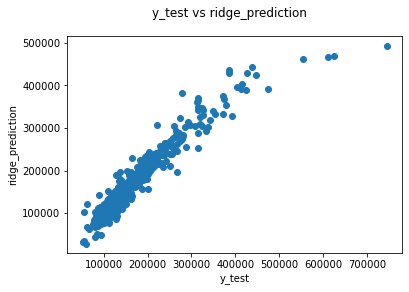

In [65]:
fig = plt.figure()
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs ridge_prediction')             
plt.xlabel('y_test')                         
plt.ylabel('ridge_prediction')  
plt.show()

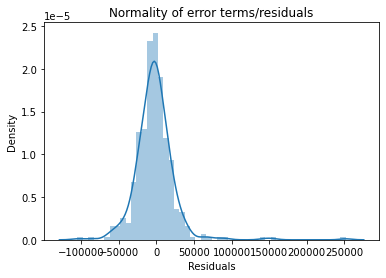

In [66]:
y_res=y_test-y_pred_test
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

# Lasso Regression

In [67]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

# fitting the training data to the model
model_cv.fit(X_train, y_train) 

Fitting 7 folds for each of 28 candidates, totalling 196 fits


GridSearchCV(cv=7, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [68]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.107855,0.007788,0.003419,0.000901,0.0001,{'alpha': 0.0001},-17260.584851,-18127.393570,-18936.133335,-16184.336716,-17347.103691,-18402.896347,-17630.664667,-17698.444740,830.180814,26,-14062.191484,-13849.611167,-13685.139917,-14347.969145,-13900.383797,-13686.111568,-14256.321875,-13969.675565,243.315556
1,0.092039,0.009827,0.002850,0.000831,0.001,{'alpha': 0.001},-17260.521604,-18127.265223,-18936.113091,-16184.308105,-17347.039171,-18402.875539,-17621.066960,-17697.027099,830.299279,25,-14062.193346,-13849.608784,-13685.135308,-14347.968329,-13900.385480,-13686.110432,-14256.317004,-13969.674098,243.315715
2,0.084919,0.017155,0.002709,0.000697,0.01,{'alpha': 0.01},-17259.889134,-18126.405779,-18935.912092,-16184.021994,-17346.393972,-18402.730301,-17525.089886,-17682.920451,832.260789,24,-14062.211964,-13849.592138,-13685.089153,-14347.960172,-13900.402300,-13686.099071,-14256.268302,-13969.660443,243.316811
3,0.065827,0.013248,0.002561,0.000730,0.05,{'alpha': 0.05},-17257.215508,-18122.614768,-18934.994006,-16182.771235,-17343.417815,-18400.516579,-17330.025181,-17653.079299,840.170008,23,-14062.304699,-13849.514938,-13684.870829,-14347.924240,-13900.460461,-13686.046808,-14255.890501,-13969.573211,243.298597
4,0.055851,0.020674,0.002280,0.000451,0.1,{'alpha': 0.1},-17253.872942,-18117.876012,-18933.851693,-16181.201673,-17339.523881,-18397.732333,-17232.298631,-17636.622452,846.014952,22,-14062.419154,-13849.418436,-13684.600792,-14347.878265,-13900.387047,-13685.981936,-14255.458588,-13969.449174,243.287781


In [69]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 100}
-16935.326571768437


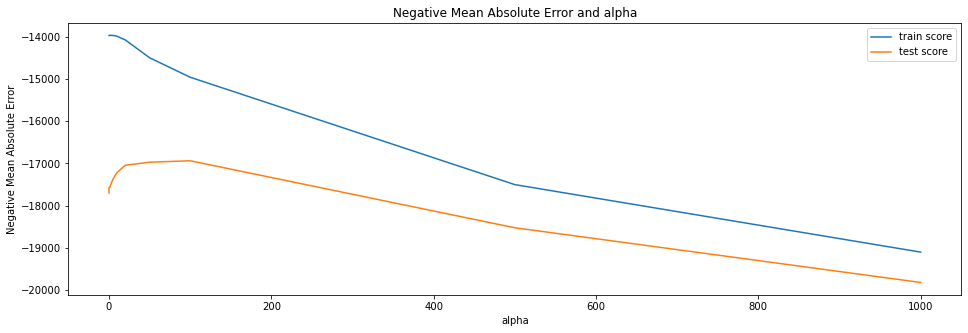

In [70]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [71]:
alpha = 100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [72]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R-squared for training data = ', r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R-squared for test data = ', r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('Residual Sum of squared for training data = ', rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('Residual Sum of squared for test data = ',rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Mean squared error for training data = ',mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Mean squared error for test data = ', mse_test_lr)
metric2.append(mse_test_lr**0.5)

R-squared for training data =  0.9107017100416134
R-squared for test data =  0.9043740886487117
Residual Sum of squared for training data =  505460985142.05054
Residual Sum of squared for test data =  309431848001.4832
Mean squared error for training data =  499961409.6360539
Mean squared error for test data =  712976608.2983484


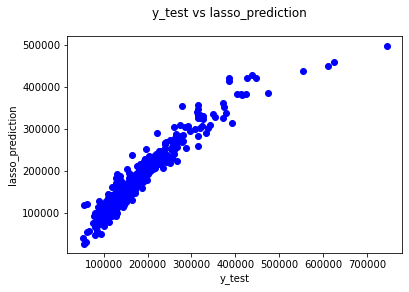

In [73]:
fig = plt.figure()
plt.scatter(y_test,y_pred_test, color='blue')
fig.suptitle('y_test vs lasso_prediction')            
plt.xlabel('y_test')                         
plt.ylabel('lasso_prediction')  
plt.show()

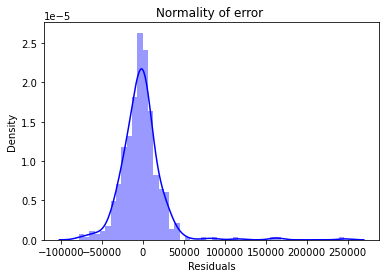

In [74]:
y_res=y_test-y_pred_test
# Distribution of errors
sns.distplot(y_res,kde=True, color='blue')
plt.title('Normality of error ')
plt.xlabel("Residuals")
plt.show()

In [75]:
lr_tab = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_tab ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metricr, name = 'Ridge Regression')
ls_metric = pd.Series(metric2, name = 'Lasso Regression')

fin_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

fin_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.228228e-01,9.174924e-01,9.107017e-01
1,R2 Score (Test),-4.010215e+20,9.025976e-01,9.043741e-01
2,RSS (Train),4.368510e+11,4.670232e+11,5.054610e+11
3,RSS (Test),1.297649e+33,3.151804e+11,3.094318e+11
4,MSE (Train),2.078696e+04,2.149283e+04,2.235982e+04
5,MSE (Test),1.729154e+15,2.694851e+04,2.670162e+04


In [76]:
# Finding out the betas
betas = pd.DataFrame(index=X_train.columns)

In [77]:
betas['Linear'] = linear_reg.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [78]:
betas.sort_values(by=['Lasso'], ascending=False).head(150)

,Linear,Ridge,Lasso
GrLivArea,2.693952e+16,82876.459632,2.401447e+05
OverallQual,6.831562e+04,63297.363054,7.522377e+04
TotalBsmtSF,1.068428e+05,54417.697764,4.146809e+04
MasVnrArea,3.481250e+04,39095.544602,3.918365e+04
OverallCond,4.868520e+04,40429.424383,3.780737e+04
BsmtFinSF1,1.915971e+04,35474.233666,3.281707e+04
ExterQual_2,2.631326e+04,26684.376414,2.567377e+04
KitchenQual_2,2.255173e+04,24591.189049,2.271597e+04
GarageCars,2.542062e+04,22547.765151,2.208081e+04
KitchenQual_0,2.816684e+04,24399.129266,2.141715e+04


In [79]:
betas[['Lasso']].sort_values(by='Lasso', ascending=False).head(10)

,Lasso
GrLivArea,240144.702152
OverallQual,75223.773543
TotalBsmtSF,41468.086036
MasVnrArea,39183.652668
OverallCond,37807.370451
BsmtFinSF1,32817.072092
ExterQual_2,25673.765390
KitchenQual_2,22715.966854
GarageCars,22080.805449
KitchenQual_0,21417.153023


# Observation :

## First

- We can find that linear regression work well with the training data but bad with test data that says that our model is not properly fitting , we can few regularization technique to overcame it

- In Ridge regression we can find that the r2 score for both training and test data are really good and seem data is properly fitting also
- In lasso regression we can find that the r2 score for both training and test data are really good and seem data is properly fitting also

The important feature we can conclude based on the sale price coefficient with different variables could be:
- GrLivArea
- OverallQual
- TotalBsmtSF
- MasVnrArea
- OverallCond
- GarageCars

The feature that can reduce the values of the price of the house are :
- houseAge
- remolded
- LowQualFinSF
- bldg
- GarageYrBlt


The tuning parameter for the Ridge and lasso are :
- Ridge - alpha : 2
- Lasso - aplha : 100
